## Exercise Sheet 2

In [68]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

### Exercise 2.1

In [69]:
def gradient_descent(x: np.ndarray, y: np.ndarray, w0: float, w1: float, learning_rate=1e-5, max_iter=1000, stop_thr=1e-6) -> (float, float, np.ndarray):    
    n = len(x)
    mse = []
    for _ in range(max_iter):
        # Partial derivatives:
        dw0 = np.sum(w0 + (w1 * x) - y) / n
        dw1 = np.sum((w0 + w1 * x - y) * x) / n
        
        # Step
        w0 = w0 - (learning_rate * dw0)
        w1 = w1 - (learning_rate * dw1)

        mse.append(calculate_mse(x, y, w0, w1))
        
        # Stop when norm of gradient is smaller than threshhold
        if np.sqrt(dw0**2+dw1**2) <= stop_thr:
            print("Stop_threshhold reached")
            return w0, w1, mse
    print("Max Iter reached")
    return w0, w1, mse

def calculate_mse(x: np.ndarray, y: np.ndarray, w0: float, w1:float) -> float:
    return np.sum((y-w0-w1*x)**2)/2/len(x)

### Exercise 2.2

In [84]:
df1 = pd.read_csv('tvads.csv', delimiter=';')
x = df1["TV"].values
y = df1["sales"].values
init_w0 = np.random.rand()
init_w1 = np.random.rand()
lr = 6.9e-5

w0, w1, mse = gradient_descent(x, y, init_w0, init_w1, learning_rate=lr, max_iter=500000)

y_init = init_w0 + (init_w1 * x)
y_pred = w0 + (w1 * x)
print(w0, w1, init_w0, init_w1)
print('lecture result: h(x) = 7.03 + 0.0475x')

Max Iter reached
7.031488091035903 0.04754225422753688 0.14064541116623164 0.6624908569085749
lecture result: h(x) = 7.03 + 0.0475x


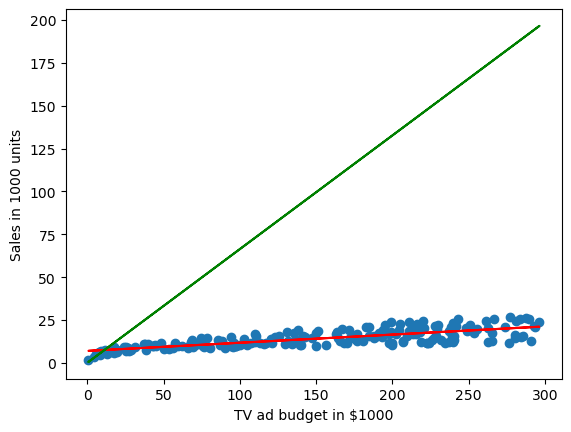

In [85]:
plt.scatter(x, y) 
plt.xlabel('TV ad budget in $1000')
plt.ylabel('Sales in 1000 units')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.plot(x, y_init, color='green', label='Initial Regression Line')

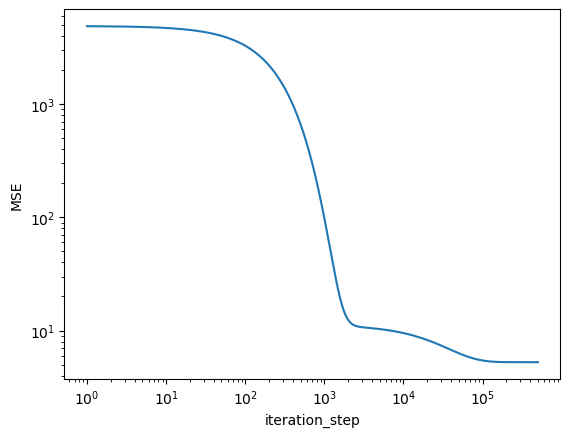

In [91]:
xvals = np.linspace(1,len(mse),num=len(mse),endpoint=True)
plt.plot(xvals, mse, label='learning_rate='+str(lr))
plt.xlabel('iteration_step')
plt.ylabel('MSE')
plt.xscale('log')
plt.yscale('log')

### Exercise 2.3

In [97]:
learning_rates = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 6.9e-5, 7e-5, 1e-4, 5e-4]
res = [gradient_descent(x, y, init_w0, init_w1, learning_rate=i, max_iter=600000) for i in learning_rates]

Max Iter reached
Max Iter reached
Max Iter reached
Max Iter reached
Max Iter reached
Max Iter reached
Max Iter reached


/var/folders/63/sr19wzr520x43kz7zgdsr2lc0000gn/T/ipykernel_95479/2371164192.py:16: RuntimeWarning: overflow encountered in scalar power
  if np.sqrt(dw0**2+dw1**2) <= stop_thr:
/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/63/sr19wzr520x43kz7zgdsr2lc0000gn/T/ipykernel_95479/2371164192.py:23: RuntimeWarning: overflow encountered in square
  return np.sum((y-w0-w1*x)**2)/2/len(x)
/var/folders/63/sr19wzr520x43kz7zgdsr2lc0000gn/T/ipykernel_95479/2371164192.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  w1 = w1 - (learning_rate * dw1)


Max Iter reached
Max Iter reached
Max Iter reached


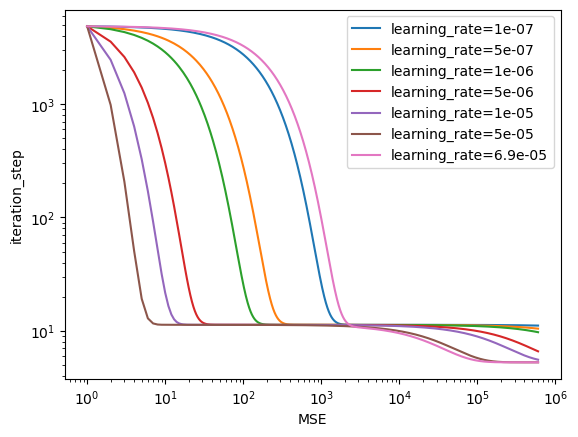

In [100]:
for (_,_,m),learning_rate in zip(res[:7],learning_rates[:7]):
    # print(m[0:50])
    # print(learning_rate)
    iteration_steps = np.linspace(1,len(m), num=len(m), endpoint=True)
    plt.plot(iteration_steps, m, label='learning_rate='+str(learning_rate))
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('MSE')
    plt.ylabel('iteration_step')


The initial MSE decrease occurs faster for larger learning rates except for the largest value. The MSE then seems to reach a "plateau". Larger learning rates decrease again earlier, leaving the "plateau". Larger learning rates also decrease faster and some also reach a second "plateau".

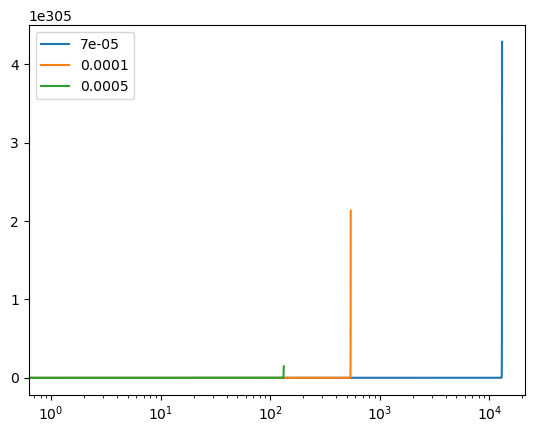

In [95]:
for (_, _, mse),learning_rate in zip(res[7:], learning_rates[7:]):
    plt.plot(range(len(mse)), mse, label='learning_rate='+str(learning_rate))
    plt.xscale('log')
    plt.legend()
    plt.xlabel('iteration_step')
    plt.ylabel('MSE')